In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import openweathermapy.core as owm
import seaborn
import random

# Import API key
from api_keys import api_key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [20]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# LIST FOR HOLDING LAT-LNGS AND CITIES
lat_lngs = []
cities = []

# CREATE A SET OF RANDOM LAT AND LNG COMBINATIONS
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

print(lats)
print(len(lats))
print(lngs)
print(lat_lngs)

[ 23.20249429   3.08853491 -19.27571081 ... -49.46941386  38.05337782
  16.01539239]
1500
[ -82.02317801 -173.19687173 -138.70844342 ...  -86.25561015   90.68920008
    5.90696475]


In [22]:
# IDENTIFY NEAREST CITY FOR EACH LAT, LONGITUDE COMBINATION
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
       cities.append(city)
       
# Print the city count to confirm sufficient count
print(len(cities))

cities

639


['santa cruz del norte',
 'saleaula',
 'rikitea',
 'lavrentiya',
 'avarua',
 'altay',
 'qasigiannguit',
 'alice springs',
 'konnur',
 'puerto ayora',
 'provideniya',
 'punta arenas',
 'hobart',
 'kenai',
 'cape town',
 'chuy',
 'mataura',
 'dikson',
 'marystown',
 'buchanan',
 'bluff',
 'ushuaia',
 'lata',
 'paita',
 'sosnovo-ozerskoye',
 'severomuysk',
 'torrington',
 'hermanus',
 'atuona',
 'busselton',
 'barentsburg',
 'constitucion',
 'mahebourg',
 'brovary',
 'myanaung',
 'port hardy',
 'riyadh',
 'fortuna',
 'kapaa',
 'selenginsk',
 'kichmengskiy gorodok',
 'goure',
 'tumannyy',
 'yellowknife',
 'new norfolk',
 'garowe',
 'sinkat',
 'ilhabela',
 'sterling',
 'bengkulu',
 'kurchanskaya',
 'khatanga',
 'clifton',
 'victoria',
 'charters towers',
 'puerto pinasco',
 'vaini',
 'esperance',
 'sitka',
 'clyde river',
 'linxia',
 'sorland',
 'qui nhon',
 'deputatskiy',
 'cabo san lucas',
 'lipin bor',
 'hilo',
 'subaytilah',
 'butaritari',
 'bolshaya martynovka',
 'taolanaro',
 'komsomo

In [23]:
# try to place the coordinates and cities in data frame for easier graph later on
weather={"City": cities}
weather_data=pd.DataFrame(weather)
weather_data["latitude"]=""
weather_data["Temperature"]=""
weather_data["Humidity"]=""
weather_data["Cloudiness"]=""
weather_data["Wind Speed"]=""
weather_data.head()

,City,latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,santa cruz del norte,,,,,
1,saleaula,,,,,
2,rikitea,,,,,
3,lavrentiya,,,,,
4,avarua,,,,,


## Perform API Calls

In [24]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# loop thru each city & get data
for index, row in weather_data.iterrows():
    city_name=row["City"]
   
    # get url
    query_url=url + "&q="+ city_name
    response = requests.get(query_url).json()

    # PRINT OUT QUERY URL AND JSON FILES SO WE CAN KNOW HOW TO GET DATA
    #print(requests.get(query_url).url)
    #print(json.dumps(response,indent=4,sort_keys=True))
    
    try:
        weather_data.loc[index,'latitude']=response['coord']['lat']
        weather_data.loc[index,'Temperature']=response['main']['temp']
        weather_data.loc[index, 'Humidity']=response['main']['humidity']
        weather_data.loc[index, 'Cloudiness']=response['clouds']['all']
        weather_data.loc[index,'Wind Speed']=response['wind']['speed']
    except (ValueError, KeyError):
        print("Skip, no weather data for that city" + city_name)
        continue
  

Skip, no weather data for that citysaleaula
Skip, no weather data for that citybarentsburg
Skip, no weather data for that citytumannyy
Skip, no weather data for that citysinkat
Skip, no weather data for that citybengkulu
Skip, no weather data for that citypuerto pinasco
Skip, no weather data for that cityqui nhon
Skip, no weather data for that citysubaytilah
Skip, no weather data for that citytaolanaro
Skip, no weather data for that citymys shmidta
Skip, no weather data for that cityilloqqortoormiut
Skip, no weather data for that citytabialan
Skip, no weather data for that citysafaga
Skip, no weather data for that citysakakah
Skip, no weather data for that citycazaje
Skip, no weather data for that citysentyabrskiy
Skip, no weather data for that citywarqla
Skip, no weather data for that cityamderma
Skip, no weather data for that cityksenyevka
Skip, no weather data for that citykamenskoye
Skip, no weather data for that citynizhneyansk
Skip, no weather data for that cityyambio
Skip, no we

In [26]:

# PLACE ALL DATA INTO DATAFRAME
print(weather_data['latitude'].count())
weather_data=pd.DataFrame(weather_data)
weather_data.head(10)
weather_data.dtypes

639


City           object
latitude       object
Temperature    object
Humidity       object
Cloudiness     object
Wind Speed     object
dtype: object

In [27]:
# Need to conver object to numeric
weather_data["latitude"]=pd.to_numeric(weather_data["latitude"])
weather_data["Temperature"]=pd.to_numeric(weather_data["Temperature"])
weather_data["Humidity"]=pd.to_numeric(weather_data["Humidity"])
weather_data["Cloudiness"]=pd.to_numeric(weather_data["Cloudiness"])
weather_data["Wind Speed"]=pd.to_numeric(weather_data["Wind Speed"])
print(weather_data.dtypes)
weather_data.head(10)

City            object
latitude       float64
Temperature    float64
Humidity       float64
Cloudiness     float64
Wind Speed     float64
dtype: object


,City,latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,santa cruz del norte,23.15,73.40,94.0,5.0,3.36
1,saleaula,NaN,NaN,NaN,NaN,NaN
2,rikitea,-23.12,73.92,100.0,24.0,12.80
3,lavrentiya,65.58,45.21,91.0,92.0,4.63
4,avarua,-21.21,75.20,78.0,75.0,11.41
5,altay,47.83,69.15,47.0,0.0,1.95
6,qasigiannguit,68.82,39.20,86.0,75.0,3.18
7,alice springs,-23.70,80.60,11.0,0.0,16.11
8,konnur,15.86,72.75,96.0,92.0,14.25
9,puerto ayora,-0.74,70.95,100.0,20.0,13.02


In [28]:
# SAVE DATA TO CSV FILE
# Output File (CSV)
#output_data_file = "output_data/cities.csv"
weather_data.to_csv('output_data/cities.csv')

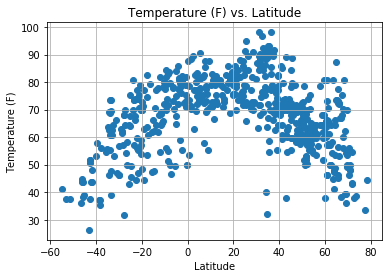

In [29]:
## SCATTER PLOT Temperature (F) vs Latitude
# NOTE: Y vs X (NOTE THAT WHEN MENTION A vs B MEANS Y VERSUS X, NOT X vs. Y)
plt.scatter(weather_data["latitude"], weather_data["Temperature"], marker="o")
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Temperature_vs_Latitude_for_random_cities_overTheWorld.jpg")
plt.show()


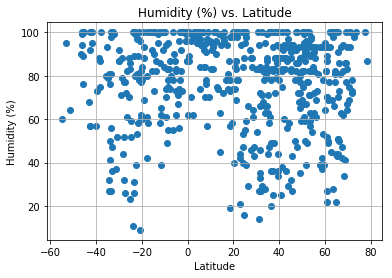

In [30]:
## SCATTER PLOT Humidity (%) vs Latitude
# NOTE: Y vs X (NOTE THAT WHEN MENTION A vs B MEANS Y VERSUS X, NOT X vs. Y)
plt.scatter(weather_data["latitude"], weather_data["Humidity"], marker="o")
plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Humidity_vs_Latitude_for_random_cities_overTheWorld.jpg")
plt.show()


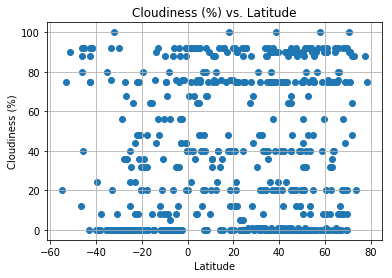

In [31]:
## SCATTER PLOT Cloudiness (%) vs Latitude
# NOTE: Y vs X (NOTE THAT WHEN MENTION A vs B MEANS Y VERSUS X, NOT X vs. Y)
plt.scatter(weather_data["latitude"], weather_data["Cloudiness"], marker="o")
plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Cloudiness_vs_Latitude_for_random_cities_overTheWorld.jpg")
plt.show()

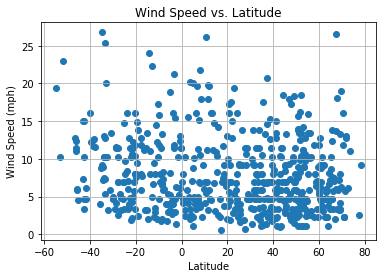

In [32]:
## SCATTER PLOT Windspeed vs Latitude
# NOTE: Y vs X (NOTE THAT WHEN MENTION A vs B MEANS Y VERSUS X, NOT X vs. Y)
plt.scatter(weather_data["latitude"], weather_data["Wind Speed"], marker="o")
plt.title("Wind Speed vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("WindSpeed_vs_Latitude_for_random_cities_overTheWorld.jpg")
plt.show()

In [33]:
## CONCLUSION
## PLEASE NOTE THAT WHEN REQUEST TO GRAPH A VS B MEANS A IS Y-AXIS AND B IS X-AXIS (B)

# Within +/- 20 degree of latitude from equator, the temperatures are in the range of 70 - 80 deg F 
    # (assume data collected is now - which is in summer time frame)
    
# For cities further away from equator, the temperature is drop (cooler) compare near equator line

# For Cloudiness, Wind speed, and Humidity, there are not enough data to make conclusion.  
    #  There is no correlation.
    # Still missing longitudinal coordinate data in order to compare.  
    # Meaning, whether those cities are located in tropical zone, desert area, ect..